# Outline
- [ 1 - Little bit of theory behind SVM](#1)
- [ 2 - Import Data and brief EDA](#2)
- [ 3 - Feature selection and train custom model](#3)
- [ 4 - Training sklearm model and fine tuning](#4)
- [ 5 - Testing with my own images](#5)

<a name="1"></a>
## 1 - Little bit of theory behind SVM

Support Vector Machine (SVM) is a powerful tool for classification tasks, focusing on finding the best 
<br>boundary that separates different classes while maximizing the margin.
<br>The objective of SVM is to find the hyperplane that maximizes the margin between two classes. 
<br>The equation for the hyperplane can be expressed as:
$$
w^T x + b = 0
$$
Where:
- \( w \) is the weight vector.
- \( x \) is the input feature vector.
- \( b \) is the bias term.
<br>The margin is defined as the distance between the hyperplane and the closest data points from each class, known as support vectors. 
$$
\frac{1}{2} \| w \|^2
$$
The optimization problem can be formulated as:
$$
\begin{align*}
    \begin{cases}
        \min_{w,b,\xi} \frac{1}{2} \| w \|^2+C\displaystyle\sum_{i=1}^l \xi_i\\
        y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \forall i\\
        \xi_i\geq0
    \end{cases}
\end{align*}
$$
<br>(Primal problem SVM)
<br>Where:
- \(y_i) is the class label of the training example \( x_i \) (either +1 or -1).
- \( i \) indexes the training examples.
- \(kxi_i) - permission for model to make mistake for the object are inside margin or on the other side of hyperplane
- \(sum_of_kxi_i) - requarement for this mistakes to be as small as possible

This is nonlinear optimization problem. For solving this problem we need to use the [`Karush–Kuhn–Tucker (KKT) conditions`](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) 
<br>and formulate the Lagrangian function in order to wright the dual problem.
<br>Let's wright down a Lagrangian of our optimization problem:
$$
L(w,b,\xi,\lambda,\mu)=\frac{1}{2} \| w \|^2+C\displaystyle\sum_{i=1}^l \xi_i-\displaystyle\sum_{i=1}^l \lambda_i(y_i (<w, x_i> + b)-1+\xi_i)-\displaystyle\sum_{i=1}^l \mu_i\xi_i
$$
Were lambda and mu are dual coeffitiants.
So let's wright the gradients with respect to each variables.
<br>Start from w and look what we'll get:
$$
\nabla_w L=w-\displaystyle\sum_{i=1}^l \lambda_iy_ix_i
;\nabla_w L=0=>
$$
$$
w=\displaystyle\sum_{i=1}^l \lambda_iy_ix_i
$$ (1)
<br>Based on this formula we can see that the solution for the problem is lies in finding lambdas.
<br>Now we need to wright gradient (in this case it is partial derivative) with respect to b:
$$
\nabla_b L=\displaystyle\sum_{i=1}^l \lambda_iy_i
;\nabla_b L=0 =>
$$ 
$$
\displaystyle\sum_{i=1}^l \lambda_iy_i=0
$$
(2)
<br>And finaly for ksi:
$$
\nabla_\xi L=C-\lambda_i-\mu_i
;\nabla_xi L=0=>
$$
$$
\lambda_i+\mu_i=C
$$ (3)
<br>And we also need to wright down co called Complementary slackness that sayes that the constrained functions are equal zero in solution point:
<br>This is the first one:
$$
\lambda_i(y_i (<w, x_i> + b)-1+\xi_i)=0  =>
$$
$$
\lambda_i=0 \lor y_i (<w, x_i> + b)=1-\xi_i
$$ (4)
<br>And the second one:
$$
\mu_i\xi_i=0=>
$$
$$
\mu_i=0 \lor \xi_i=0
$$ (5)

#### Types of objects based on our expressions

<br>1. lambda_i = 0
$$
\lambda_i=0; (3) => \mu_i=C; (5) => \xi_i=0; => y_i (<w, x_i> + b)\geq1
$$
<br> This types of object does't influese on solution.

<br>2. 0<lambda_i<C => this object does not cross the margin but lies on that line. This is the Support Vector.
$$
0<\lambda_i<C; (3) => \mu_i\neq0; (5) => \xi_i=0; => y_i (<w, x_i> + b)=1, y_i\in{-1,+1}
$$
$$
b = 1/y_i-w^T x_i => b = y_i-w^T x_i
$$

<br>3. Lambda_i = C and xsi_i > 0 => object crosses the magrin line
$$
\lambda_i=C; (3) => \mu_i=0; (5) => \xi_i>0;
$$

Befor we formulate dual problem let's make some simplification to our Lagrangian and take into account (2) and (3)
$$
L=\frac{1}{2}w*w+C\displaystyle\sum_{i=1}^l \xi_i-\displaystyle\sum_{i=1}^l \lambda_i(y_i (<w, x_i> + b)-1+\xi_i)-\displaystyle\sum_{i=1}^l \mu_i\xi_i =>
$$
$$
L=\frac{1}{2}w*w-\displaystyle\sum_{i=1}^l \lambda_iy_i<w, x_i>-\displaystyle\sum_{i=1}^l \lambda_iy_ib+\displaystyle\sum_{i=1}^l \lambda_i+(C\displaystyle\sum_{i=1}^l \xi_i-\displaystyle\sum_{i=1}^l \lambda_i\xi_i - \displaystyle\sum_{i=1}^l \mu_i\xi_i) =>
$$
$$
L=\frac{1}{2}w*w-\displaystyle\sum_{i=1}^l \lambda_iy_i<w, x_i>-\displaystyle\sum_{i=1}^l \lambda_iy_ib+\displaystyle\sum_{i=1}^l \lambda_i+\displaystyle\sum_{i=1}^l \xi_i(C-\lambda_i-\mu_i) =>
$$
From (2) and (3) will get
$$
L=\frac{1}{2}w*w-\displaystyle\sum_{i=1}^l \lambda_iy_i<w, x_i>+\displaystyle\sum_{i=1}^l \lambda_i=>
$$

$$
L=\frac{1}{2}\displaystyle\sum_{i=1}^l \lambda_iy_ix_i*\displaystyle\sum_{i=1}^l \lambda_iy_ix_i-\displaystyle\sum_{i=1}^l \lambda_iy_ix_i*\displaystyle\sum_{i=1}^l \lambda_iy_ix_i + \displaystyle\sum_{i=1}^l \lambda_i
$$


$$
L=\displaystyle\sum_{i=1}^l \lambda_i-\frac{1}{2}\displaystyle\sum_{i,j=1}^l \lambda_i\lambda_jy_iy_j<x_i, x_j>
$$
where
$$
<x_i, x_j> = x_i^Tx_j
$$
and that expression can be writen as kernal K(<x_i,x_j>) to represent our object in some 
<br>higher dimentional space, where this object can be lenearly separated with hyperplane and this is so caled "kernal trick".

And now we can wright the dual problem, which is maximization problem, for our original task of minimization:
$$
\begin{align*}
    \begin{cases}
        \max_{\lambda} (\displaystyle\sum_{i=1}^l \lambda_i-\frac{1}{2}\displaystyle\sum_{i,j=1}^l \lambda_i\lambda_jy_iy_j<x_i, x_j>)\\
        \displaystyle\sum_{i=1}^l \lambda_iy_i=0\\
        0\leq\lambda_i\leq C
    \end{cases}
\end{align*}
$$
(Dual problem SVM)

Now let us focus on solving prime optimization problem with gradient discent aproach. First we need to derive loss function based on which we will update weights.
We need to:

1) Enforce the margin constraints: We require each data point to be classified correctly, which gives the constraints:
$$
y_i (w^T x_i + b) \geq 1 - \xi_i
$$
This ensures that data points are either correctly classified and outside the margin or, if misclassified, have a slack variable 
𝜉
to allow some margin violations.

2) Regularize the weights: The objective is to maximize the margin between the classes, which is equivalent to minimizing 
ensuring the margin is as large as possible.

$$
\frac{1}{2} \| w \|^2
$$

3) Penalty for misclassifications: The introduction of the slack variables 
𝜉
introduces a penalty for misclassified points. The total penalty is:
$$
C\displaystyle\sum_{i=1}^l \xi_i
$$
where
C is the regularization parameter that controls the trade-off between the width of the margin and the penalty for misclassifications.

Thus, the loss function 
𝐿(w,b,ξ) is a combination of these two goals: minimizing the weight vector's magnitude (maximizing the margin) and penalizing misclassified points (via slack variables).

Hinge loss:
$$
Loss = \displaystyle\sum_{i=1}^l\max(0,1-y_i(<w,x_i>+b))
$$
This loss function penalizes the model whenever the predicted score 𝑤^𝑇𝑥+𝑏 is less than 1 (which corresponds to points that are within the margin or misclassified). 
<br>If the point is correctly classified and outside the margin, the loss is 0.
<br>And we need to consider the margin term. The last expression for loss function is:
$$
Loss = \frac{1}{2} \| w \|^2+C\displaystyle\sum_{i=1}^l\max(0,1-y_i(<w,x_i>+b))
$$

In [ ]:
Gradient descent.


<a name="2"></a>
## 2 - Import Data and brief EDA

<br> Data set is provided form [`Kaggle Breast Cancer Dataset`](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/Users/sergeiakhmadulin/My Drive/SVM/breast-cancer.csv")

In [3]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
target_names = ["Benign", "Malignant"]

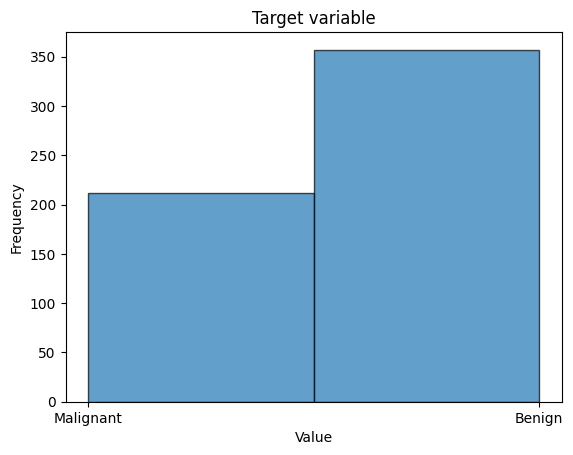

In [5]:
plt.hist(data["diagnosis"].map({"B": target_names[0], "M": target_names[1]}), bins=2, edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Target variable')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [6]:
data["diagnosis"] = data["diagnosis"].map({"B": 1, "M": -1})

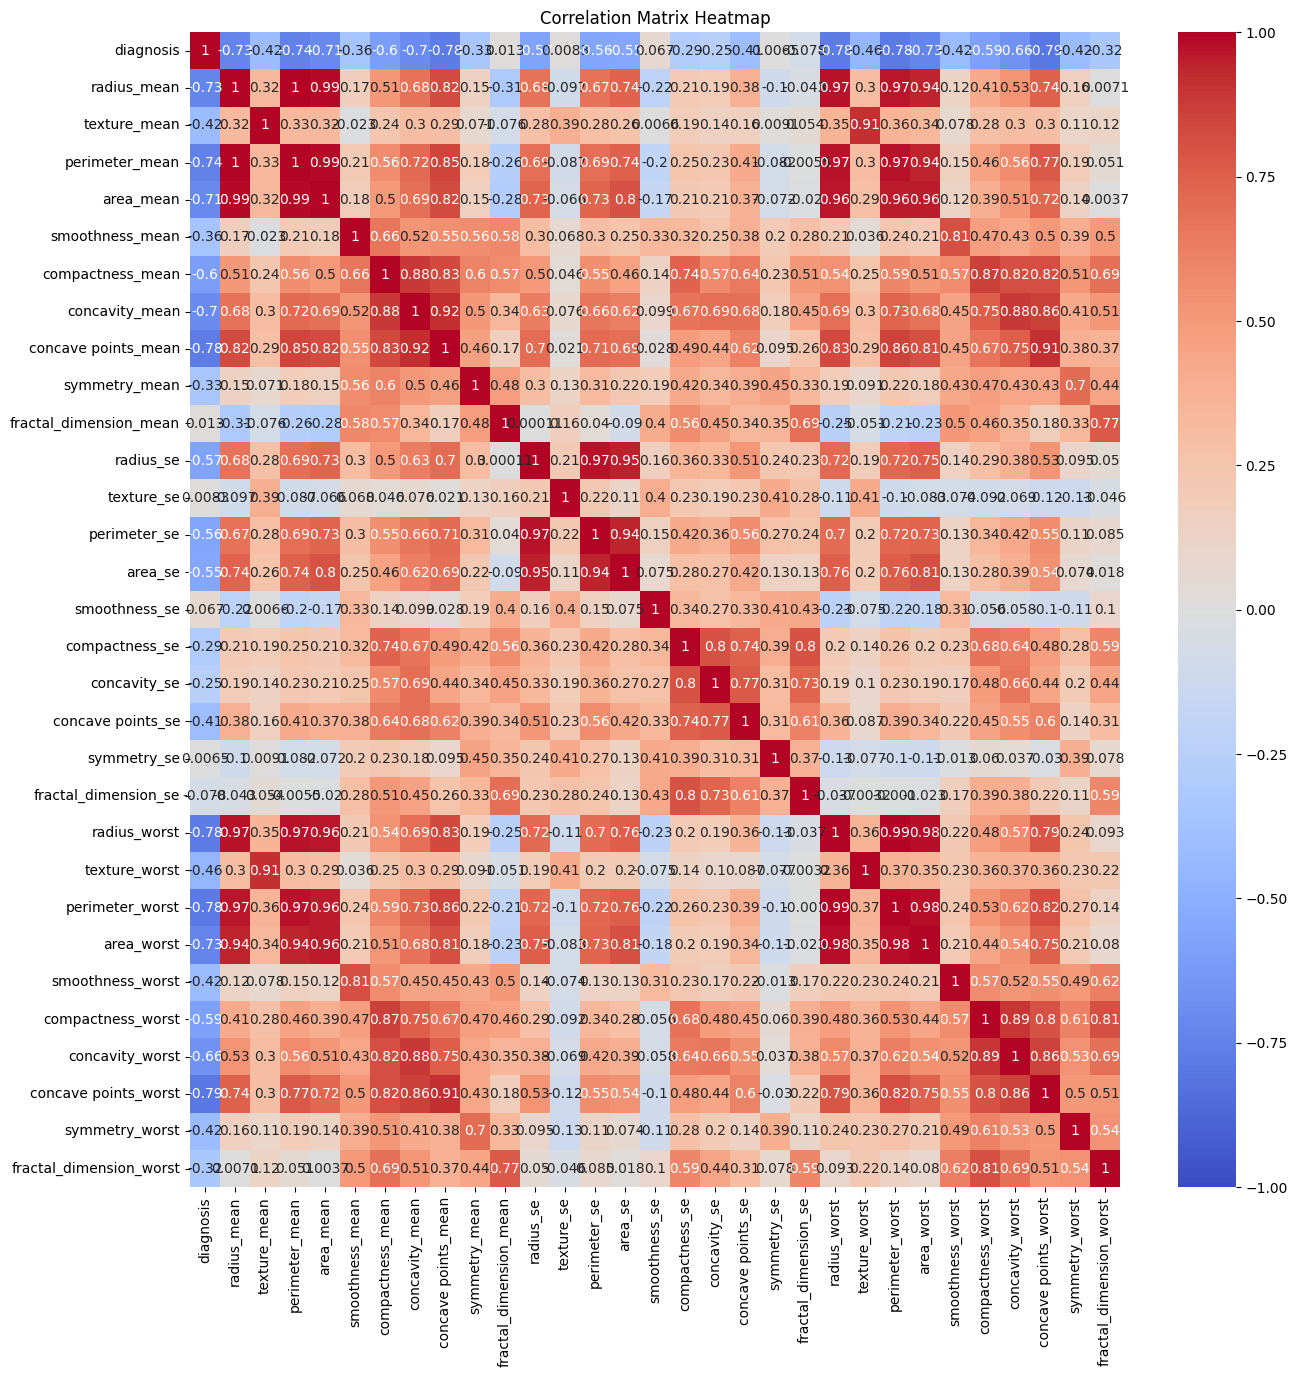

In [7]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

<a name="3"></a>
## 3 - Feature selection and train custom model

#### As we saw there are many corralated features in data. Though for SVM it has't affects as for liniar models let's keep only highly valuable features for model. For this task we will use evaluate feature importanse and keep the most important ones.  

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(data.iloc[:, 2:], data.iloc[:, 1:2])

DecisionTreeClassifier(random_state=42)

In [9]:
feature_importances = dt.feature_importances_

Important features based on Decision Tree:
radius_worst


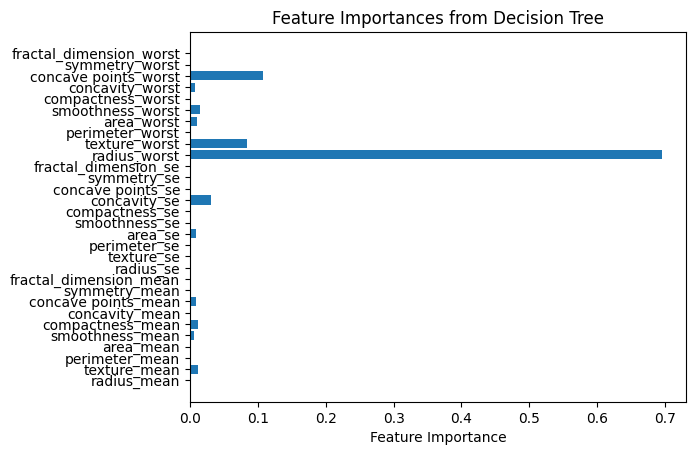

In [10]:
print("Important features based on Decision Tree:")
print(data.iloc[:, 2:].columns[np.argmax(feature_importances)])

# Step 5: Plot the feature importances
plt.barh(data.iloc[:, 2:].columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Decision Tree")
plt.show()

In [99]:
X = data.iloc[:, 2:].iloc[:, np.argsort(feature_importances)[::-1][:3]]
y = data[["diagnosis"]]

In [12]:
def plot_confusion_matrix(Y_true, Y_pred):
    cm = confusion_matrix(Y_true, Y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    
    # Set plot labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

In [13]:
def plot_roc_auc_curve(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
scaler = StandardScaler()
X_scaled_tr = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [16]:
import Custom_SVM

In [17]:
import importlib
importlib.reload(Custom_SVM)

<module 'Custom_SVM' from '/Users/sergeiakhmadulin/My Drive/SVM/Custom_SVM.py'>

In [18]:
svm = Custom_SVM.CustomSVM()

In [19]:
svm.fit(X_scaled_tr, np.squeeze(y_train.reset_index(drop=True)))

In [20]:
y_pr_test_custm = svm.predict(X_scaled_test)

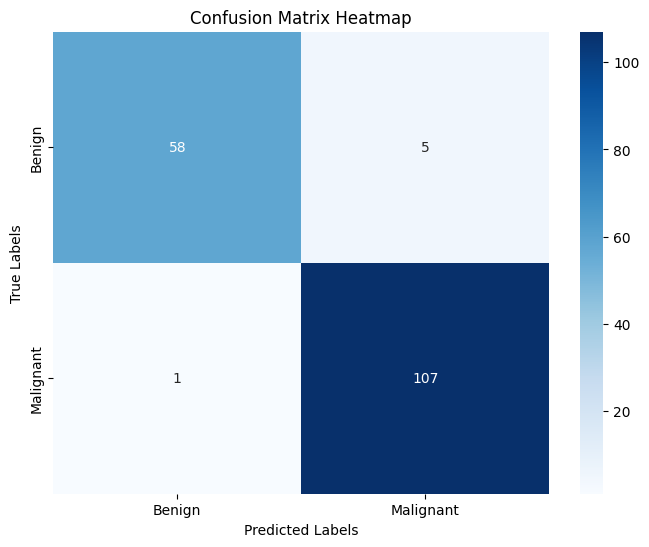

In [21]:
plot_confusion_matrix(y_test, y_pr_test_custm)

We have observed good performance in our model when looking at the confusion matrix. Since we are dealing with medical data, the goal 
<br>is to determine whether the observation is likely to be a more severe type of cancer. Based on this, we expect that for this type of problem, 
<br>it is more important to have a higher Precision metric than Recall.

However, this expectation does not hold true for our custom model.

Let's focuse on model from sklearn package. Compare perfomance and try to improve "out of the box" settings. 

<a name="4"></a>
## 4 - Training sklearm model and fine tuning

In [22]:
svm_clf = SVC(kernel='linear', gamma='scale',probability=True) 
svm_clf.fit(X_scaled_tr, y_train)
y_pred = svm_clf.predict(X_scaled_test)
y_pred_prob = svm_clf.predict_proba(X_scaled_test)

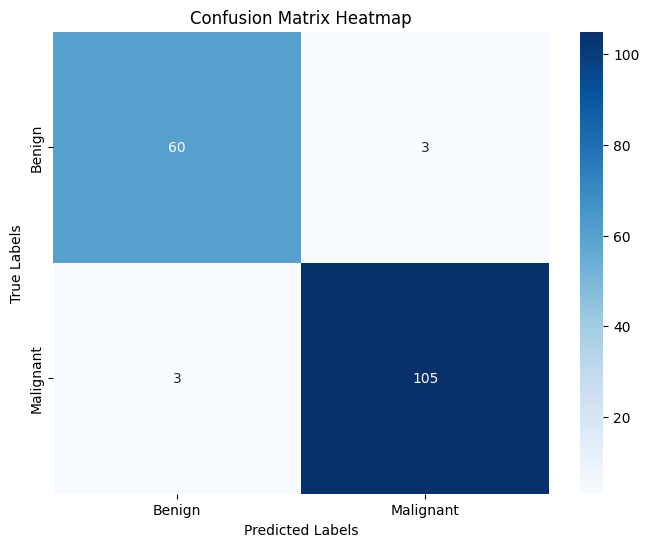

In [23]:
plot_confusion_matrix(y_test, y_pred)

In [24]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.95      0.95      0.95        63
   Malignant       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



With a Precision of 0.97 and a Recall of 0.97, our model demonstrates excellent performance in identifying the target class. 
<br>This indicates that the model is both highly accurate in predicting positive cases (with only 3% false positives) and also 
<br>effective at capturing nearly all relevant positive cases (with only 3% false negatives).

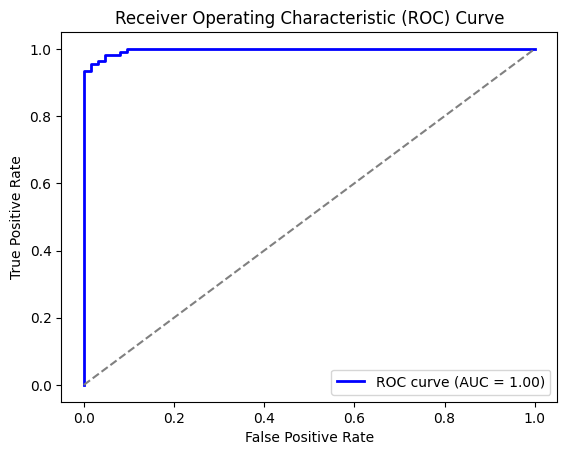

In [25]:
plot_roc_auc_curve(y_test, y_pred_prob)

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [128]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient (only for rbf, poly, sigmoid)
    # 'degree': [3, 4, 5]  # Only used for poly kernel
}

In [129]:
svm = SVC(probability=True)

In [136]:
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)

In [137]:
grid_search.fit(X_scaled_tr, y_train.squeeze())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='precision', verbose=1)

In [138]:
best_model = grid_search.best_estimator_

In [139]:
y_pred_best = best_model.predict(X_scaled_test)
y_pred_prob_best = best_model.predict_proba(X_scaled_test)

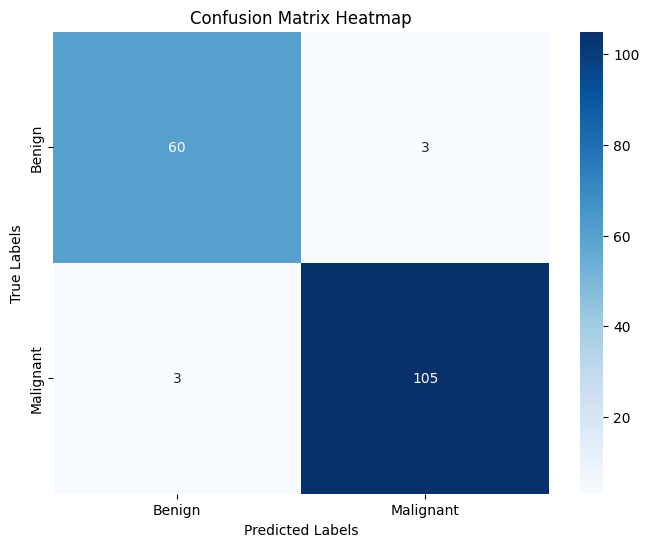

In [140]:
plot_confusion_matrix(y_test, y_pred_best)

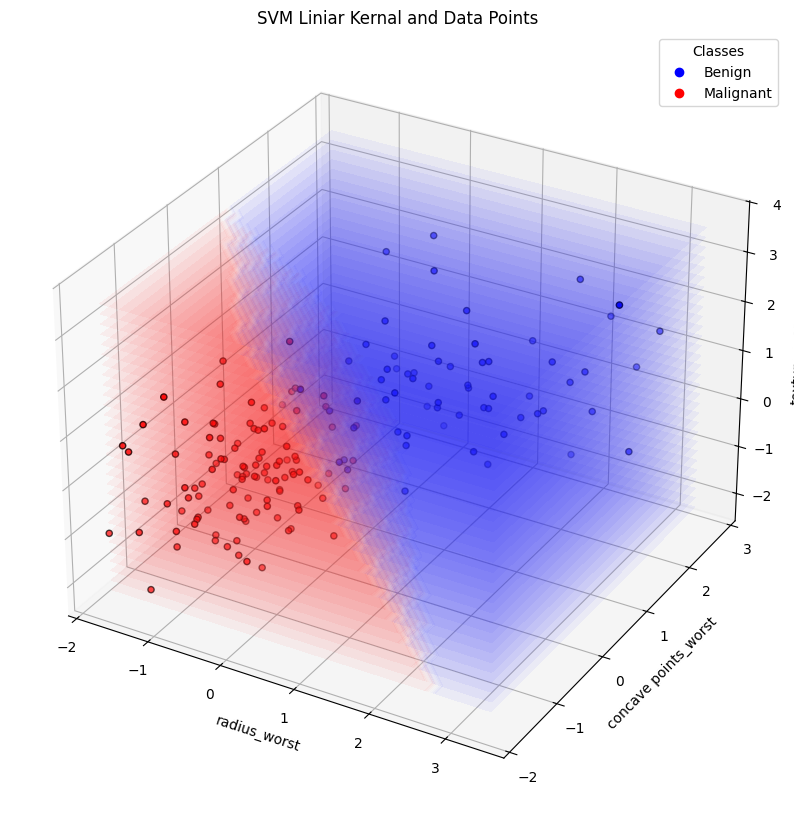

In [141]:
# Get the decision function for visualization
xx, yy = np.meshgrid(np.linspace(X_scaled_test[:, 0].min(), X_scaled_test[:, 0].max(), 30),
                     np.linspace(X_scaled_test[:, 1].min(), X_scaled_test[:, 1].max(), 30))

# We'll predict the third dimension (z) based on a fixed value from the grid for now
# Create a mesh grid for the third feature (Z)
zz = np.linspace(X_scaled_test[:, 2].min(), X_scaled_test[:, 2].max(), 30)

# Initialize 3D plot
fig = plt.figure(figsize=(10, 11))
ax = fig.add_subplot(111, projection='3d')

# Predict the class label for every point in the 3D space
Z = np.zeros((xx.shape[0], yy.shape[0], len(zz)))
for i, z_val in enumerate(zz):
    grid_points = np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), z_val)]
    Z[:, :, i] = svm_clf.predict(grid_points).reshape(xx.shape)

# Plot data points
ax.scatter(X_scaled_test[:, 0], X_scaled_test[:, 1], X_scaled_test[:, 2], c=y_test, cmap='bwr', edgecolors='k', marker='o')

# Plot decision boundary surfaces
for i, z_val in enumerate(zz):
    ax.contourf(xx, yy, Z[:, :, i], zdir='z', offset=z_val, cmap='bwr', alpha=0.05)

# surface = ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.6)
# Add labels and title
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])
ax.set_title('SVM Liniar Kernal and Data Points')
handles, labels = sc.legend_elements()
ax.legend(handles, target_names, title="Classes")
plt.show()